In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("master.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.shape

(27820, 12)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
df = df.dropna()

In [9]:

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month


if "Value" in df.columns:
    df["Value_Category"] = pd.cut(
        df["Value"],
        bins=3,
        
        labels=["Low","Medium","High"]
    )

In [10]:
col = df.select_dtypes(include="object").columns[0]

unique_vals = df[col].unique()
id_map = {v:i+1 for i,v in enumerate(unique_vals)}

df["category_id"] = df[col].map(id_map)

print(id_map)

{'Albania': 1, 'Antigua and Barbuda': 2, 'Argentina': 3, 'Armenia': 4, 'Australia': 5, 'Austria': 6, 'Azerbaijan': 7, 'Bahamas': 8, 'Bahrain': 9, 'Barbados': 10, 'Belarus': 11, 'Belgium': 12, 'Belize': 13, 'Bosnia and Herzegovina': 14, 'Brazil': 15, 'Bulgaria': 16, 'Canada': 17, 'Chile': 18, 'Colombia': 19, 'Costa Rica': 20, 'Croatia': 21, 'Cuba': 22, 'Cyprus': 23, 'Czech Republic': 24, 'Denmark': 25, 'Ecuador': 26, 'El Salvador': 27, 'Estonia': 28, 'Fiji': 29, 'Finland': 30, 'France': 31, 'Georgia': 32, 'Germany': 33, 'Greece': 34, 'Grenada': 35, 'Guatemala': 36, 'Guyana': 37, 'Hungary': 38, 'Iceland': 39, 'Ireland': 40, 'Israel': 41, 'Italy': 42, 'Jamaica': 43, 'Japan': 44, 'Kazakhstan': 45, 'Kuwait': 46, 'Kyrgyzstan': 47, 'Latvia': 48, 'Lithuania': 49, 'Luxembourg': 50, 'Maldives': 51, 'Malta': 52, 'Mauritius': 53, 'Mexico': 54, 'Montenegro': 55, 'Netherlands': 56, 'New Zealand': 57, 'Nicaragua': 58, 'Norway': 59, 'Oman': 60, 'Panama': 61, 'Paraguay': 62, 'Philippines': 63, 'Poland'

In [11]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,category_id
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X,1
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent,1
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation,1
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X,1
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X,1


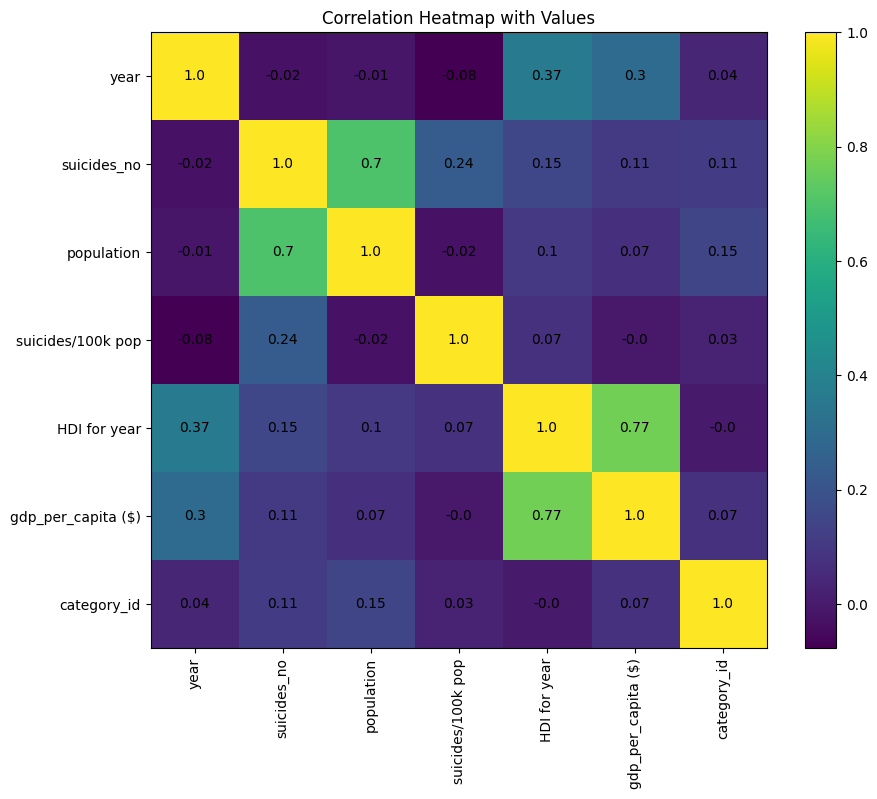

In [12]:

# Select numeric columns
num_df = df.select_dtypes(include=np.number)

# Correlation
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
plt.imshow(corr)

# Add numbers on heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i,
                 round(corr.iloc[i, j], 2),
                 ha="center", va="center")

plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap with Values")
plt.show()

In [13]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation',
       'category_id'],
      dtype='object')

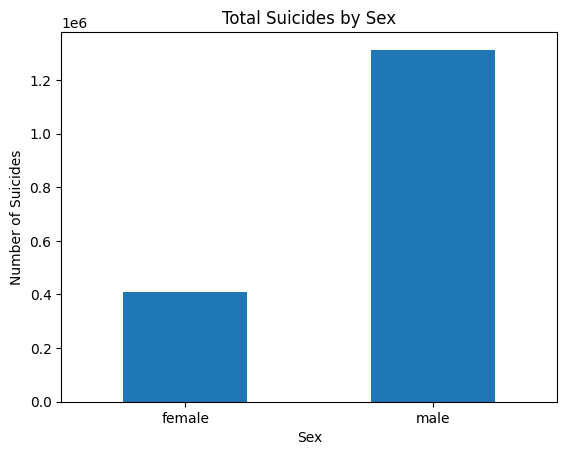

In [14]:
# Group data
data = df.groupby("sex")["suicides_no"].sum()

# Plot
data.plot(kind="bar")

plt.title("Total Suicides by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=0)

plt.show()

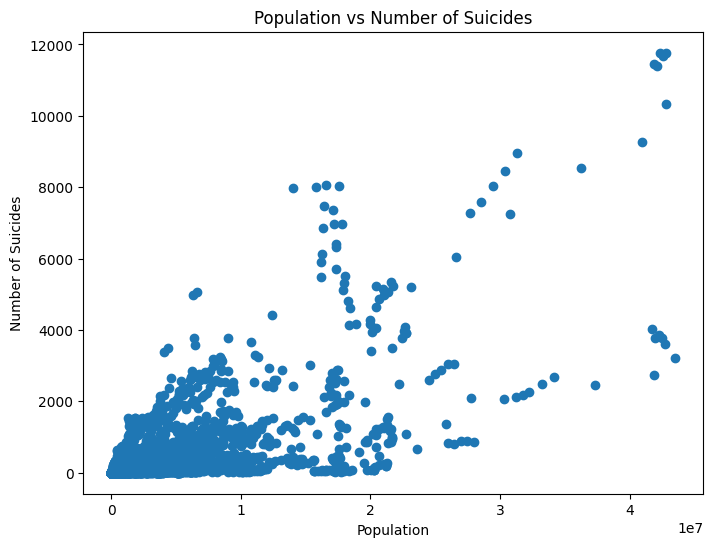

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df["population"], df["suicides_no"])

plt.title("Population vs Number of Suicides")
plt.xlabel("Population")
plt.ylabel("Number of Suicides")

plt.show()

In [16]:
unique_df = df[["category_id","country"]].drop_duplicates()

In [17]:
unique_df.head()

,category_id,country
72,1,Albania
540,2,Antigua and Barbuda
588,3,Argentina
960,4,Armenia
1486,5,Australia


In [18]:
file1 = unique_df[["country", "category_id"]]

file1.to_csv("country_category.csv", index=False)


In [19]:
file2 = df.drop(columns=["country","age","country-year","HDI for year"])
file2.to_csv("category_rest.csv", index=False)

In [21]:
file2.head()

,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,category_id
72,1995,male,13,232900,5.58,"2,424,499,009",835,Generation X,1
73,1995,male,9,178000,5.06,"2,424,499,009",835,Silent,1
74,1995,female,2,40800,4.90,"2,424,499,009",835,G.I. Generation,1
75,1995,female,13,283500,4.59,"2,424,499,009",835,Generation X,1
76,1995,male,11,241200,4.56,"2,424,499,009",835,Generation X,1
